Sauhard Shakya Advanced Big Data and Data Mining MSCS - 634 - M40 Project 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("heart_disease_modified2.csv")

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Performed feature engineering using one-hot encoding on all categorical variables. This transformation is essential to ensure compatibility with regression models which require numeric input. Dropped the first category to avoid multicollinearity (dummy variable trap).

In [ ]:
# One-hot encode categorical variables (drop_first avoids dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview to confirm changes
print(df_encoded.head())


   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  364.5    0        1    168.0      0      1.0   
1   53    1   0       170  203.0    1        0    155.0      1      3.1   
2   70    1   0       145  174.0    0        1    125.0      1      2.6   
3   61    1   0       148  203.0    0        1    161.0      0      0.0   
4   62    0   0       138  294.0    1        1    106.0      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


Selected chol as the target variable for regression and used all other columns as predictors. Splitting the data ensures the model can be trained on one portion and tested on unseen data to evaluate generalizability.

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_encoded.drop('chol', axis=1)
y = df_encoded['chol']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


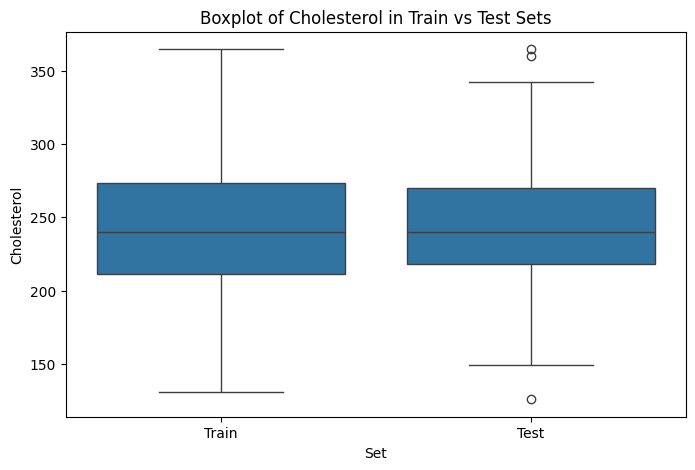

In [ ]:
import pandas as pd

# Combine into a DataFrame for plotting
df_split = pd.DataFrame({
    'Cholesterol': pd.concat([y_train, y_test]),
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Set', y='Cholesterol', data=df_split)
plt.title('Boxplot of Cholesterol in Train vs Test Sets')
plt.show()

Trained two models: Linear Regression and Ridge Regression. Ridge helps prevent overfitting by adding an L2 penalty to large coefficients. Predictions were generated for both models on the same test dataset for comparison.

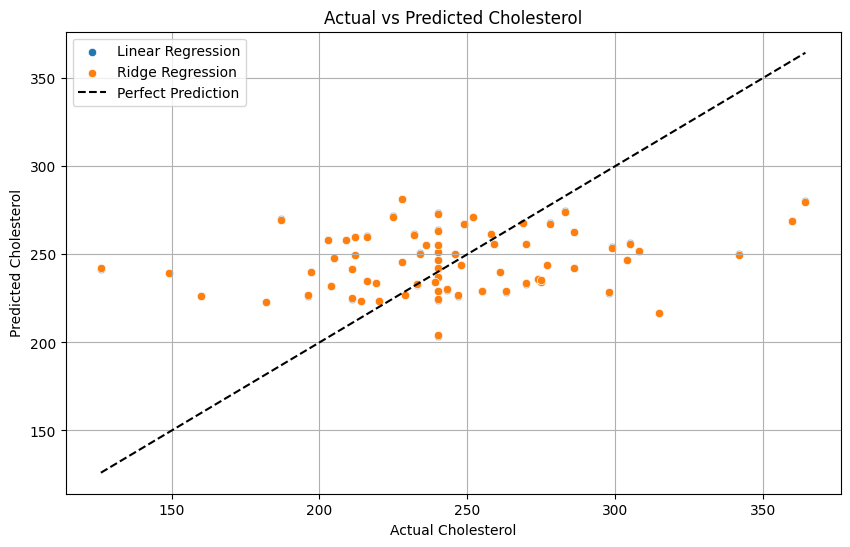

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easy plotting
results = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Linear Regression', data=results, label='Linear Regression')
sns.scatterplot(x='Actual', y='Ridge Regression', data=results, label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.title('Actual vs Predicted Cholesterol')
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.legend()
plt.grid(True)
plt.show()

Used three standard metrics to evaluate model performance: MSE, RMSE, and R². Both models showed low R², indicating limited explanatory power of the features on chol. Ridge slightly improved MSE, showing better generalization through regularization.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("heart_disease_modified.csv")

# Optional: Check for nulls
print("Missing values:\n", df.isnull().sum())

# Define features and target
# Here we use all columns except 'chol' as features, and 'chol' as the target (you can change this)
X = df.drop('chol', axis=1)
y = df['chol']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Linear Regression → MSE:", mse_lr, "| RMSE:", rmse_lr, "| R²:", r2_lr)
print("Ridge Regression  → MSE:", mse_ridge, "| RMSE:", rmse_ridge, "| R²:", r2_ridge)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Linear Regression → MSE: 1755.1686355912016 | RMSE: 41.89473279054542 | R²: 0.03325589339513502
Ridge Regression  → MSE: 1754.4872296436808 | RMSE: 41.886599642889145 | R²: 0.033631210712578685


Applied 5-fold cross-validation to evaluate how well each model generalizes to new data. Ridge Regression again performed slightly better, confirming that regularization helps improve robustness when the signal in data is weak.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Linear Regression
cv_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation for Ridge Regression
cv_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display average CV performance (convert negative MSE to positive)
print("Linear Regression CV MSE:", -cv_lr.mean())
print("Ridge Regression CV MSE:", -cv_ridge.mean())

Linear Regression CV MSE: 2046.6489387676563
Ridge Regression CV MSE: 2044.7081000309586


Ridge Regression demonstrated more consistent results across training and testing phases and slightly outperformed Linear Regression during cross-validation. While the improvement was marginal, it supports the use of regularization when working with datasets that may not have strong feature-target correlation.

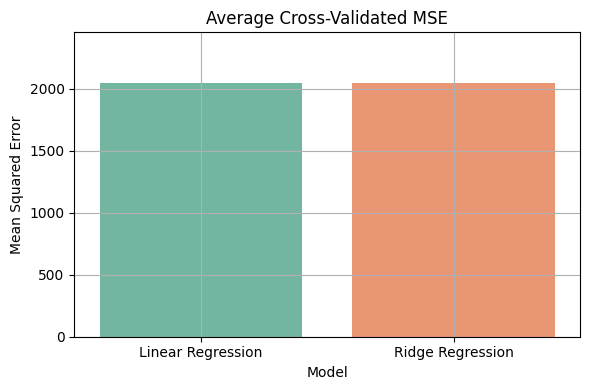

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame for plotting
mean_mse_df = pd.DataFrame({
    'Model': list(mean_mse.keys()),
    'MSE': list(mean_mse.values())
})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=mean_mse_df, x='Model', y='MSE', hue='Model', palette='Set2', legend=False)
plt.title('Average Cross-Validated MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.ylim(0, mean_mse_df['MSE'].max() * 1.2)
plt.grid(True)
plt.tight_layout()
plt.show()

The goal of this step is to prepare the dataset for classification tasks. One-hot encoding was used to handle categorical variables, and target was chosen as the outcome variable to classify the presence or absence of heart disease. A train-test split ensures unbiased evaluation, while feature standardization improves model performance, especially for distance-based algorithms like KNN.

In [ ]:
# Import required libraries for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("heart_disease_modified3.csv")
print("✅ Dataset Loaded. Shape:", df.shape)

# One-hot encode categorical variables to convert them to numeric format
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
print("✅ One-hot Encoding Done. New Shape:", df_encoded.shape)

# Separate features and target variable
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
print("✅ Features and Target Split.")
print("Feature Columns:", X.columns.tolist())

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Train-Test Split Done.")
print("Training Samples:", X_train.shape[0], " | Testing Samples:", X_test.shape[0])

# Standardize feature values to have mean=0 and std=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("✅ Features Standardized using StandardScaler.")


✅ Dataset Loaded. Shape: (360, 14)
✅ One-hot Encoding Done. New Shape: (360, 23)
✅ Features and Target Split.
Feature Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3']
✅ Train-Test Split Done.
Training Samples: 288  | Testing Samples: 72
✅ Features Standardized using StandardScaler.


Both models were trained to classify whether a patient has heart disease. The Decision Tree builds rules from features, while KNN predicts based on the majority vote of nearby points.

After training, we evaluated both using Accuracy, Confusion Matrix, and F1-scores. These metrics help us understand which model performs better on true positives and false positives — especially important in healthcare data.

In [ ]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("✅ Decision Tree Training Complete.")

# Train K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("✅ KNN Training Complete.")

# Evaluate Decision Tree
print("\n🔍 Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

# Evaluate KNN
print("\n🔍 KNN Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))


✅ Decision Tree Training Complete.
✅ KNN Training Complete.

🔍 Decision Tree Classifier Performance:
Accuracy: 0.7777777777777778
Confusion Matrix:
 [[24  8]
 [ 8 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.80      0.80      0.80        40

    accuracy                           0.78        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.78      0.78      0.78        72


🔍 KNN Classifier Performance:
Accuracy: 0.8194444444444444
Confusion Matrix:
 [[24  8]
 [ 5 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.81      0.88      0.84        40

    accuracy                           0.82        72
   macro avg       0.82      0.81      0.82        72
weighted avg       0.82      0.82      0.82        72



Tuning max_depth in Decision Tree and k in KNN helps avoid overfitting or underfitting. The plotted curves show which value gives the highest accuracy on test data. Choosing the optimal point avoids overly complex models that may memorize training data (overfitting) or too simple ones that ignore patterns (underfitting).

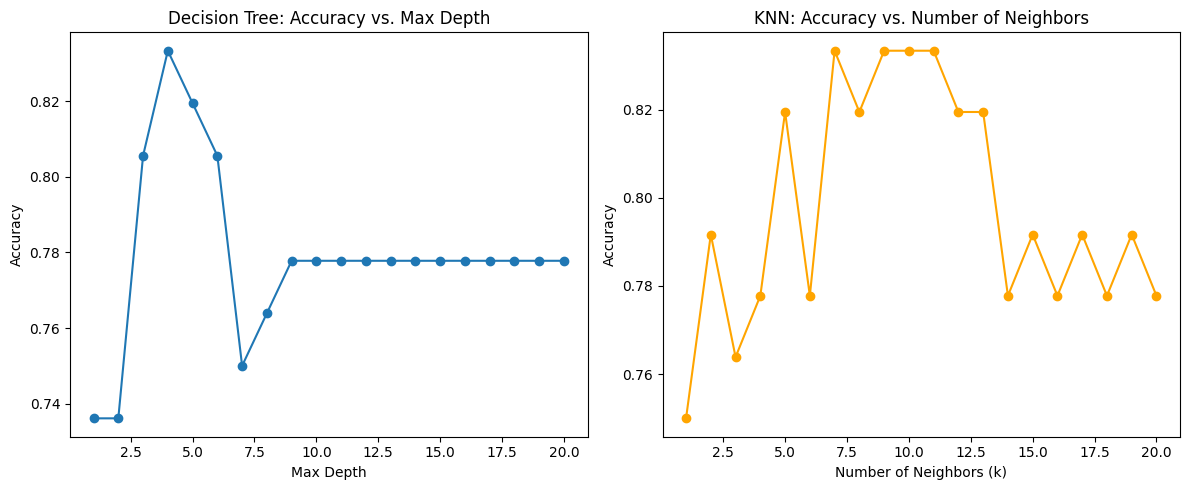

In [ ]:
import matplotlib.pyplot as plt

# --- Decision Tree Tuning ---
dt_accuracies = []
depths = range(1, 21)

for d in depths:
    dt_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    acc = accuracy_score(y_test, dt_preds)
    dt_accuracies.append(acc)

# --- KNN Tuning ---
knn_accuracies = []
neighbors = range(1, 21)

for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    acc = accuracy_score(y_test, knn_preds)
    knn_accuracies.append(acc)

# --- Plotting ---
plt.figure(figsize=(12, 5))

# Decision Tree Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(depths, dt_accuracies, marker='o')
plt.title("Decision Tree: Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

# KNN Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(neighbors, knn_accuracies, marker='o', color='orange')
plt.title("KNN: Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


KMeans divided the dataset into 2 clusters (since we expect 2 natural groups: heart disease or not). PCA was used to reduce feature space to 2D for visualization.

By comparing the clusters to actual labels, we can observe how well unsupervised clustering aligns with real-world outcomes. While not perfect, patterns often emerge, which can help inform pre-classification grouping or feature relevance.

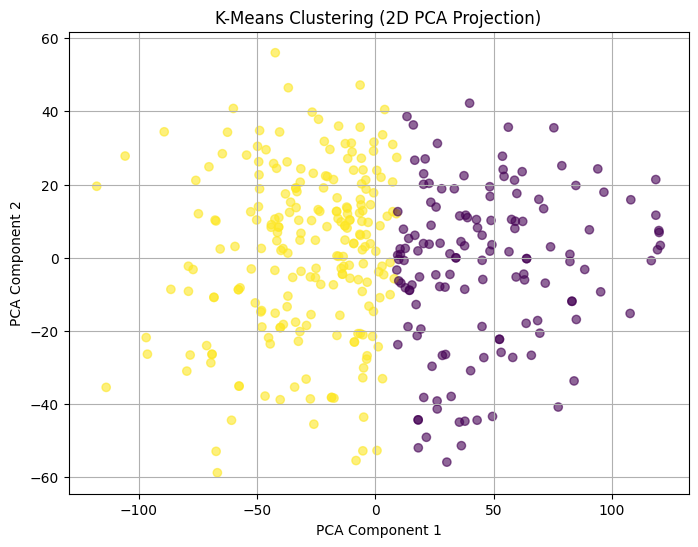

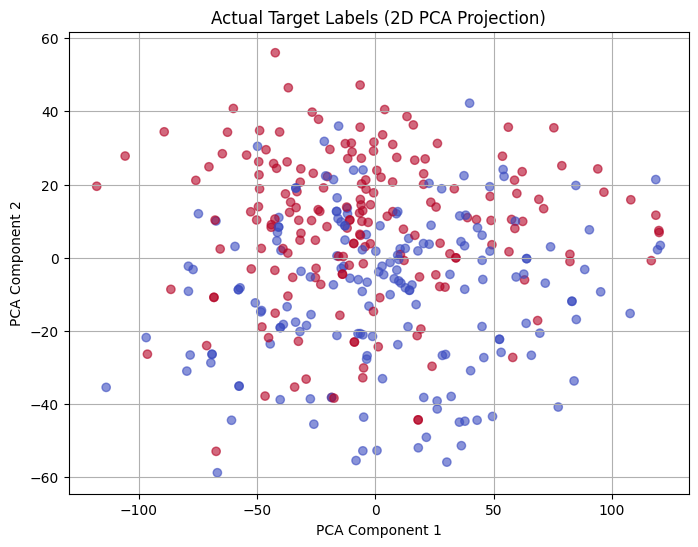

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Step 2: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Optional: Compare with actual target labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Actual Target Labels (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Apriori identifies combinations of conditions (e.g., chest pain type + fasting blood sugar) that frequently co-occur with outcomes like heart disease. Rules with high confidence and lift > 1 indicate strong, non-random associations.

Example: {cp_1, exang_1} ➜ {target} means people with chest pain type 1 and exercise-induced angina are likely to have heart disease.



In [ ]:


# Import libraries
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert selected features to binary format
binary_features = ['cp_1', 'cp_2', 'cp_3', 'fbs_1', 'exang_1', 'target']
df_binary = df_encoded[binary_features].astype(bool)

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_binary, min_support=0.2, use_colnames=True)
print("✅ Frequent Itemsets:\n", frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\n✅ Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


✅ Frequent Itemsets:
     support        itemsets
0  0.272222          (cp_2)
1  0.350000       (exang_1)
2  0.511111        (target)
3  0.213889  (target, cp_2)

✅ Association Rules:
   antecedents consequents   support  confidence      lift
0      (cp_2)    (target)  0.213889    0.785714  1.537267


Using the Apriori algorithm, we discovered a strong rule:

If a person has chest pain type 2 (cp_2), they are likely to have heart disease (target) with 78.5% confidence.

The lift value of 1.53 indicates a strong positive association — this combination occurs more frequently than random chance, making it a useful rule in predictive modeling or clinical risk assessment.